<a href="https://colab.research.google.com/github/mauriciogmathias/confusionMatrix/blob/main/confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install tensorflow

In [29]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import pandas as pd

In [30]:
tf.__version__

'2.15.0'

In [31]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [32]:
log_dir='log'

In [34]:
#loading and pre-processing data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [35]:
#defining the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [37]:
#configuring tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

In [38]:
#compiling and training the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 56s 29ms/step - loss: 0.1459 - accuracy: 0.9558 - val_loss: 0.0657 - val_accuracy: 0.9806
Epoch 2/5
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0478 - accuracy: 0.9852 - val_loss: 0.0380 - val_accuracy: 0.9875
Epoch 3/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0349 - accuracy: 0.9890 - val_loss: 0.0324 - val_accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0272 - accuracy: 0.9916 - val_loss: 0.0321 - val_accuracy: 0.9904
Epoch 5/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0208 - accuracy: 0.9931 - val_loss: 0.0291 - val_accuracy: 0.9905


In [39]:
#evaluating the model
y_true=test_labels
y_pred=model.predict(test_images)

y_pred_labels = np.argmax(y_pred, axis=1)

313/313 [==============================] - 2s 7ms/step


In [40]:
classes= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

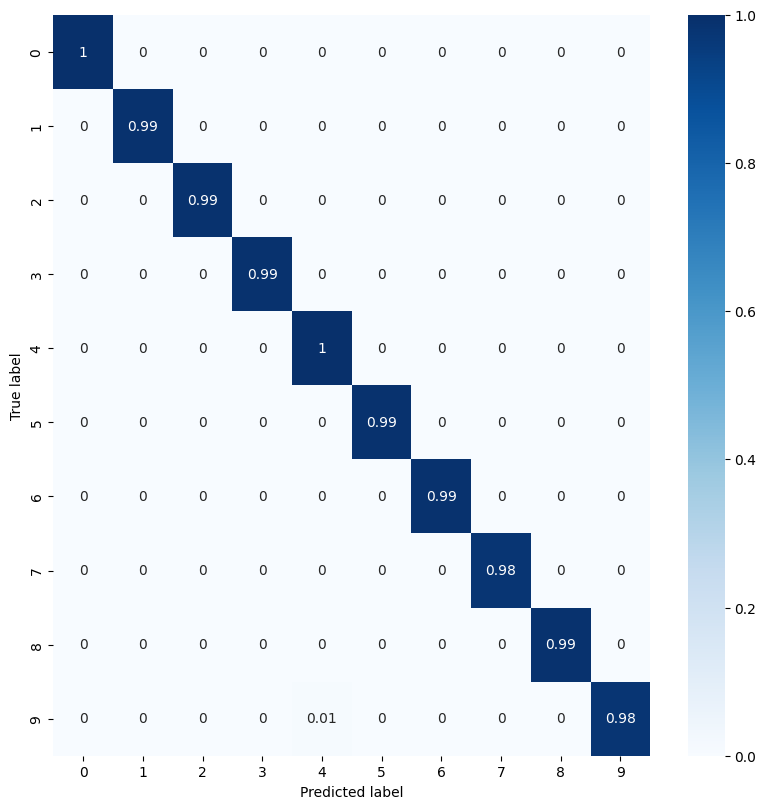

In [41]:
#bulding confusion matrix for vizualization
confusion_matrix=tf.math.confusion_matrix(labels=y_true, predictions=y_pred_labels).numpy()

confusion_matrix_norm = np.around(confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis], decimals=2)

confusion_matrix_df = pd.DataFrame(confusion_matrix_norm,
                             index = classes,
                             columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [43]:
#calculating confusion matrix elements
TP = np.diag(confusion_matrix_norm)
FP = confusion_matrix_norm.sum(axis=0) - TP
FN = confusion_matrix_norm.sum(axis=1) - TP
TN = confusion_matrix_norm.sum() - (TP + FP + FN)

#calculating metrics
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
f_score = 2 * (precision * sensitivity) / (precision + sensitivity)

#calculating global metrics
mean_sensitivity = np.mean(sensitivity)
mean_specificity = np.mean(specificity)
overall_accuracy = np.mean(accuracy)
mean_precision = np.mean(precision)
mean_f_score = np.mean(f_score)

print("Sensibilidade (Recall) Média:", mean_sensitivity)
print("Especificidade Média:", mean_specificity)
print("Acurácia Global:", overall_accuracy)
print("Precisão Média:", mean_precision)
print("F-score Médio:", mean_f_score)

Sensibilidade (Recall) Média: 0.998989898989899
Especificidade Média: 0.9998877665544332
Acurácia Global: 0.9997981836528759
Precisão Média: 0.9990099009900991
F-score Médio: 0.9989948733489911
